## Key Terms

*    Data frame: A two-dimensional data structure inside Pandas similar to a spreadsheet, with columns and rows.

*    Series: A one-dimensional array with axis labels, usually created from a Pandas data frame column.

*    Loading: The process of reading external data into a Pandas data frame.

*    Exploratory analysis: Initial investigation of data to understand its characteristics before further analysis.

*    Exporting: Saving data from a Pandas data frame out to another format like CSV or Excel.

## Pandas

* **Pandas overview**

  * Python library for **loading, editing, cleaning, manipulating, and visualizing datasets**
  * Very powerful and widely used
  * Must be installed separately (`pip install pandas`)
  * Recommended: use **virtual environments** (`python3 -m venv venv`) and requirements file

* **Import alias**

  * Convention: `import pandas as pd`
  * `pd` is used throughout tutorials and documentation

* **Main object: DataFrame**

  * Think of it as a **spreadsheet-like structure**
  * Rows + Columns + Cells
  * Created with data, column names, and index
  * Example:

    ```python
    data = [[30, 21, 10],
            [20, 13, 7],
            [15, 17, 9]]
    df = pd.DataFrame(data, columns=["apples","bananas","oranges"], index=["Mon","Tue","Wed"])
    ```

---

### **Loading data into Pandas**

* **From remote URL (CSV on GitHub, etc.)**

  * Must use **raw file URL** (not HTML page)
  * Example:

    ```python
    url = "https://raw.githubusercontent.com/.../wine-ratings.csv"
    df = pd.read_csv(url, index_col=0)
    ```
* **From local CSV file**

  * `pd.read_csv("file.csv")`
* **From JSON**

  * `pd.read_json("file.json")`
* **Other formats supported**

  * Excel → `pd.read_excel("file.xlsx")`
  * Clipboard → `pd.read_clipboard()`
  * XML, HTML, Parquet, etc.

---

### **Writing data from Pandas**

* Done from a **DataFrame object** (not from `pd`)
* **Export formats** include:

  * CSV → `df.to_csv("file.csv")`
  * Excel → `df.to_excel("file.xlsx")`
  * Dictionary → `df.to_dict()`
  * Parquet → `df.to_parquet("file.parquet")`
  * HTML → `df.to_html("dataset.html")`

    * Produces `<table>` with rows, headers, and data
  * Clipboard + Markdown →

    ```python
    from pandas.io.clipboard import to_clipboard
    df.to_clipboard(sep="\t")   # Excel-compatible
    df.to_clipboard(excel=False)  # Markdown / plain text
    ```

    * Allows pasting DataFrame directly into Markdown or Excel

---

* **Key takeaway**

  * Pandas is extremely **flexible**: can read from and write to many formats
  * Import with alias `pd`
  * Core object is **DataFrame**
  * Great for moving data between **different file types, web sources, and tools**


In [3]:
import pandas as pd

data = [[4,2,1],
        [3,0,1],
        [1,0,0]]  #multidimensional arrays

columns = ['apples', 'bananas', 'oranges']
index = ['monday', 'tuesday', 'wednesday']

fruits = pd.DataFrame(data, index, columns)
fruits

,apples,bananas,oranges
monday,4,2,1
tuesday,3,0,1
wednesday,1,0,0


In [4]:
#creating pandas from online csv

csv_url = 'https://raw.githubusercontent.com/paiml/wine-ratings/refs/heads/main/wine-ratings.csv'
'''
that's the raw url from the github repo, it should be 
githubusercontent and not github.com
'''

df = pd.read_csv(csv_url, index_col=0) #first column is the index
df.head()

,name,grape,region,variety,rating,notes
0,1000 Stories Bourbon Barrel Aged Batch Blue Ca...,NaN,"Mendocino, California",Red Wine,91.0,"This is a very special, limited release of 100..."
1,1000 Stories Bourbon Barrel Aged Gold Rush Red...,NaN,California,Red Wine,89.0,The California Gold Rush was a period of coura...
2,1000 Stories Bourbon Barrel Aged Gold Rush Red...,NaN,California,Red Wine,90.0,The California Gold Rush was a period of coura...
3,1000 Stories Bourbon Barrel Aged Zinfandel 2013,NaN,"North Coast, California",Red Wine,91.0,"The wine has a deep, rich purple color. An int..."
4,1000 Stories Bourbon Barrel Aged Zinfandel 2014,NaN,California,Red Wine,90.0,Batch #004 is the first release of the 2014 vi...


In [5]:
'''
reading csv from local directory

read_csv('file_path/file_name.csv')

read_json('file_path/file_name.json')

'''


"\nreading csv from local directory\n\nread_csv('file_path/file_name.csv')\n\nread_json('file_path/file_name.json')\n\n"

In [6]:
df = pd.read_csv('data/world-championship-qualifier.csv')
df.head()

,Rank,Name,Nationality,Result,Notes,Group
0,1.0,Svatoslav Ton,Czech Republic,2.14,q,A
1,1.0,Toni Huikuri,Finlandi,2.14,q,A
2,1.0,James Brierley,United Kingdom,2.14,q,A
3,1.0,Noriyasu Arai,Japan,2.14,q,A
4,5.0,Yannick Tregaro,Sweden,2.14,q,A


## Write to many other destinations
The destinations are from a `Dataframe` object itself, not from the `pd` object.

Including the clipboard!

 - to_clipboard
 - to_csv
 - to_dict
 - to_excel
 - to_feather
 - to_gbq
 - to_hdf
 - to_html
 - to_json
 - to_latex
 - to_markdown
 - to_numpy
 - to_parquet
 - to_period
 - to_pickle
 - to_records
 - to_sql
 - to_stata
 - to_string
 - to_timestamp
 - to_xarray
 - to_xml

In [7]:
#exporting

df.to_html('data/dataset.html')

In [11]:
#copy paste to other formats

#to markdown and then to clipboard
#this needs tabulate dependency
from pandas.io.clipboards import to_clipboard
md = df.to_markdown()
#to_clipboard(md, excel=False) - only windows

### EDA with Pandas

* **Quick exploration tools in Pandas**

  * `df.head(n)` → preview first *n* rows (default 5)
  * `df.describe()` → summary stats (count, mean, std, min, quartiles, max)
  * `df.info()` → data types, non-null counts, memory usage

* **Sorting**

  * `df.sort_values("rating", ascending=False)` → highest-rated wines first

* **Dropping columns**

  * `df.drop("grape", axis=1, inplace=True)` → remove unhelpful column

* **Grouping**

  * `df.groupby("region")["rating"].mean()` → average rating per region

* **NaN values**

  * Missing data shown as `NaN` ("Not a Number")

**Key takeaway:** Pandas makes it easy to inspect, clean, sort, drop, and group data for fast exploratory analysis.


In [40]:
import pandas as pd
df = pd.read_csv(csv_url, index_col=0)
df.head(15)

,name,grape,region,variety,rating,notes
0,1000 Stories Bourbon Barrel Aged Batch Blue Ca...,NaN,"Mendocino, California",Red Wine,91.0,"This is a very special, limited release of 100..."
1,1000 Stories Bourbon Barrel Aged Gold Rush Red...,NaN,California,Red Wine,89.0,The California Gold Rush was a period of coura...
2,1000 Stories Bourbon Barrel Aged Gold Rush Red...,NaN,California,Red Wine,90.0,The California Gold Rush was a period of coura...
3,1000 Stories Bourbon Barrel Aged Zinfandel 2013,NaN,"North Coast, California",Red Wine,91.0,"The wine has a deep, rich purple color. An int..."
4,1000 Stories Bourbon Barrel Aged Zinfandel 2014,NaN,California,Red Wine,90.0,Batch #004 is the first release of the 2014 vi...
5,1000 Stories Bourbon Barrel Aged Zinfandel 2016,NaN,California,Red Wine,91.0,"1,000 Stories Bourbon barrel-aged Zinfandel is..."
6,1000 Stories Bourbon Barrel Aged Zinfandel 2017,NaN,California,Red Wine,92.0,"Batch 55 embodies an opulent vintage, which sa..."
7,12 Linajes Crianza 2014,NaN,"Ribera del Duero, Spain",Red Wine,92.0,Red with violet hues. The aromas are very inte...
8,12 Linajes Reserva 2012,NaN,"Ribera del Duero, Spain",Red Wine,94.0,"On the nose, a complex predominance of mineral..."
9,14 Hands Cabernet Sauvignon 2010,NaN,"Columbia Valley, Washington",Red Wine,87.0,Concentrated aromas of dark stone fruits and t...


In [41]:
df.describe()

,grape,rating
count,0.0,32780.000000
mean,NaN,91.186608
std,NaN,2.190391
min,NaN,85.000000
25%,NaN,90.000000
50%,NaN,91.000000
75%,NaN,92.000000
max,NaN,99.000000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32780 entries, 0 to 32779
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     32780 non-null  object 
 1   grape    0 non-null      float64
 2   region   32777 non-null  object 
 3   variety  32422 non-null  object 
 4   rating   32780 non-null  float64
 5   notes    32780 non-null  object 
dtypes: float64(2), object(4)
memory usage: 1.8+ MB


In [43]:
df.sort_values(by='rating', ascending=False).head()

,name,grape,region,variety,rating,notes
2946,Aubert CIX Vineyard Pinot Noir 2015,NaN,"Sonoma Coast, Sonoma County, California",Red Wine,99.0,"Aubert’s first ever Estate Pinot Noir, the CIX..."
2940,Aubert CIX Vineyard Chardonnay 2014,NaN,"Sonoma Coast, Sonoma County, California",White Wine,99.0,The 2014 CIX Estate Chardonnay conveys the qui...
2943,Aubert CIX Vineyard Pinot Noir (1.5L Magnum) 2015,NaN,"Sonoma Coast, Sonoma County, California",Red Wine,99.0,"Aubert’s first ever Estate Pinot Noir, the CIX..."
3005,Aubert Sugar Shack Estate Chardonnay 2015,NaN,"Napa Valley, California",White Wine,99.0,The 2015 Sugar Shack Estate Chardonnay is a wi...
30767,Krug Vintage Brut (1.5 Liter Magnum) 1996,NaN,"Champagne, France",Sparkling & Champagne,99.0,Krug 1996 is extraordinary indeed – an extreme...


In [44]:
#remove any newlines or carriage returns
df = df.replace({"\r": ""}, regex=True)
df = df.replace({"\n": ""}, regex=True)

#grape is not a very good column, so let's drop it
df.drop(['grape'], axis=1, inplace=True)
'''
inplace will make the modifications either within
the dataframe or not.'''
df.describe()

,rating
count,32780.000000
mean,91.186608
std,2.190391
min,85.000000
25%,90.000000
50%,91.000000
75%,92.000000
max,99.000000


In [47]:
#df.groupby("name").mean()
#the above method is outdated and results in TypeError
#type(df)

df.groupby("region")["rating"].mean()

region
Abruzzo, Italy                                               89.954545
Aconcagua Valley, Chile                                      90.633333
Adelaida District, Paso Robles, Central Coast, California    92.357143
Adelaide Hills, South Australia, Australia                   89.625000
Adelaide, South Australia, Australia                         90.000000
                                                               ...    
Yakima Valley, Columbia Valley, Washington                   91.141304
Yamhill-Carlton District, Willamette Valley, Oregon          91.404762
Yarra Valley, Victoria, Australia                            89.630769
Yorkville Highlands, Mendocino, California                   92.000000
Yountville, Napa Valley, California                          93.473684
Name: rating, Length: 404, dtype: float64

#### Exercises

*    Load a JSON or Excel dataset into a Pandas data frame.

*    Try sorting a data frame based on a column value like date or price.

*    Filter a data frame to remove rows with missing values.

*    Plot a histogram of a numeric column like sales totals.

*    Practice exporting filtered or sorted data to a CSV file.

## Dataframe


### **Selecting Columns & Rows**

* Single column → `df["notes"]`
* Multiple columns → `df[["name", "rating"]]`
* Subset rows with conditions →

  ```python
  df[df["rating"] > 96]
  ```
* Boolean mask returns True/False for all rows

### **Querying Data**

* Cleaner syntax with `.query()`

  ```python
  df.query("rating > 94 and region == 'Ribera del Duero'")
  ```
* String matching:

  ```python
  df.query("region.str.contains('robles', na=False, engine='python')")
  ```

### **Creating / Modifying Columns**

* Add new column with operations:

  ```python
  df["variety_short"] = df["variety"].replace({"red wine": "R", "white wine": "W"})
  ```
* Always safer to create new column vs overwrite

### **Text Manipulation**

* **Replace values** with `replace()`
* **Split strings** into lists with `str.split()`, then pick part with `str.get()`

  ```python
  df["region_short"] = df["region"].str.split(",").str.get(-1)
  ```
* Useful for cleaning messy text fields like “Mendocino, California” → “California”

✅ **Takeaway:** Pandas lets you **filter, query, and transform text** in DataFrames easily. Use conditions + `.query()` for powerful filtering, and string methods (`replace`, `split`, `contains`) for cleaning text columns.



In [48]:
wine_notes = df['notes']
wine_notes.head()

0    This is a very special, limited release of 100...
1    The California Gold Rush was a period of coura...
2    The California Gold Rush was a period of coura...
3    The wine has a deep, rich purple color. An int...
4    Batch #004 is the first release of the 2014 vi...
Name: notes, dtype: object

In [49]:
named_ratings = df[['name', 'rating']]
named_ratings.head()

,name,rating
0,1000 Stories Bourbon Barrel Aged Batch Blue Ca...,91.0
1,1000 Stories Bourbon Barrel Aged Gold Rush Red...,89.0
2,1000 Stories Bourbon Barrel Aged Gold Rush Red...,90.0
3,1000 Stories Bourbon Barrel Aged Zinfandel 2013,91.0
4,1000 Stories Bourbon Barrel Aged Zinfandel 2014,90.0


In [50]:
top_named_ratings = named_ratings[df['rating']>96]
top_named_ratings.head()

,name,rating
218,Abreu Vineyards Cappella 2010,98.0
220,Abreu Vineyards Howell Mountain 2009,98.0
221,Abreu Vineyards Las Posadas Howell Mountain 2012,99.0
223,Abreu Vineyards Madrona Ranch 1996,98.0
227,Abreu Vineyards Madrona Ranch 2005,98.0


In [53]:
df['rating']>96

0        False
1        False
2        False
3        False
4        False
         ...  
32775    False
32776    False
32777    False
32778    False
32779    False
Name: rating, Length: 32780, dtype: bool

In [54]:
#using queries
df.query('rating > 93').head()

,name,region,variety,rating,notes
8,12 Linajes Reserva 2012,"Ribera del Duero, Spain",Red Wine,94.0,"On the nose, a complex predominance of mineral..."
36,3 Rings Reserve Shiraz 2004,"Barossa Valley, Barossa, South Australia, Aust...",Red Wine,96.0,Vintage Comments : Classic Barossa vintage con...
109,Aalto 2004,"Ribera del Duero, Spain",Red Wine,94.0,"""The 2004 Aalto has a far different personalit..."
110,Aalto 2005,"Ribera del Duero, Spain",Red Wine,95.0,The grapes come exclusively from old vineyards...
111,Aalto 2007,"Ribera del Duero, Spain",Red Wine,95.0,It is ironic that one of the youngest properti...


In [56]:
#combined queries
df.query("rating > 94 & region == 'Ribera del Duero, Spain'").head(10)

,name,region,variety,rating,notes
110,Aalto 2005,"Ribera del Duero, Spain",Red Wine,95.0,The grapes come exclusively from old vineyards...
111,Aalto 2007,"Ribera del Duero, Spain",Red Wine,95.0,It is ironic that one of the youngest properti...
113,Aalto 2008,"Ribera del Duero, Spain",Red Wine,95.0,This wine's elegance and fruitful presence per...
121,Aalto 2016,"Ribera del Duero, Spain",Red Wine,95.0,"Deep purple red color, as corresponds to old T..."
123,Aalto PS 2013,"Ribera del Duero, Spain",Red Wine,95.0,Aalto PS (Pagos Seleccionada) is made only in ...
125,Aalto PS 2015,"Ribera del Duero, Spain",Red Wine,95.0,Aalto PS (Pagos Seleccionada) is made only in ...
365,Adega Pena das Donas Ribeira Sacra Verdes Mata...,"Ribera del Duero, Spain",Red Wine,95.0,100% Mencia
2058,Antonino Izquierdo 2006,"Ribera del Duero, Spain",Red Wine,95.0,Izquierdo displays an intense and clear red co...
5781,Bodegas Uvaguilera Aguilera Palomero 2001,"Ribera del Duero, Spain",Red Wine,96.0,The nose presents a perfect balance between th...
5804,Bodegas Valderiz Ribera del Duero 2016,"Ribera del Duero, Spain",Red Wine,96.0,The grapes are sourced from vineyards planted ...


In [ ]:
#chain queries to use python engine to operate on strings

top_wines = df.query('rating>95')

#na=False is used when there are NaN entries. None are here,
#but we use it just in case

paso_robles=  top_wines.query("region.str.contains('Robles', na=False)"
                              ,engine='python')
paso_robles.head()

,name,region,variety,rating,notes
3050,Austin Hope Cabernet Sauvignon 2016,"Paso Robles, Central Coast, California",Red Wine,96.0,"Deep ruby in color, the 2016 Austin Hope Caber..."
6272,Booker Vineyard Estate 24 2014,"Paso Robles, Central Coast, California",Red Wine,96.0,"Blend: 51% Tempranillo, 28% Syrah, 13% Petit V..."
6273,Booker Vineyard Estate Syrah Blend 2013,"Paso Robles, Central Coast, California",Red Wine,96.0,"Fashioned after the old Alchemist, this wine w..."
6277,Booker Vineyard Fracture Syrah 2011,"Paso Robles, Central Coast, California",Red Wine,97.0,Just over half of our property is planted with...
6284,Booker Vineyard Jada 2015,"Paso Robles, Central Coast, California",Red Wine,96.0,This Grenache heavy wine is very elegant and p...


In [63]:
paso_robles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 3050 to 32056
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     29 non-null     object 
 1   region   29 non-null     object 
 2   variety  29 non-null     object 
 3   rating   29 non-null     float64
 4   notes    29 non-null     object 
dtypes: float64(1), object(4)
memory usage: 1.4+ KB


In [64]:
#manipulating textual data

df['variety_short'] = df['variety'].replace({"Red Wine":"R", "White Wine":"W"})
df.head()

,name,region,variety,rating,notes,variety_short
0,1000 Stories Bourbon Barrel Aged Batch Blue Ca...,"Mendocino, California",Red Wine,91.0,"This is a very special, limited release of 100...",R
1,1000 Stories Bourbon Barrel Aged Gold Rush Red...,California,Red Wine,89.0,The California Gold Rush was a period of coura...,R
2,1000 Stories Bourbon Barrel Aged Gold Rush Red...,California,Red Wine,90.0,The California Gold Rush was a period of coura...,R
3,1000 Stories Bourbon Barrel Aged Zinfandel 2013,"North Coast, California",Red Wine,91.0,"The wine has a deep, rich purple color. An int...",R
4,1000 Stories Bourbon Barrel Aged Zinfandel 2014,California,Red Wine,90.0,Batch #004 is the first release of the 2014 vi...,R


In [65]:
#splitting region and keeping only the last part
df['region_short'] = df['region'].str.split().str.get(-1)
#first we split the region, and then get the last word from the split words
df.query("region_short != 'California'").head()

,name,region,variety,rating,notes,variety_short,region_short
7,12 Linajes Crianza 2014,"Ribera del Duero, Spain",Red Wine,92.0,Red with violet hues. The aromas are very inte...,R,Spain
8,12 Linajes Reserva 2012,"Ribera del Duero, Spain",Red Wine,94.0,"On the nose, a complex predominance of mineral...",R,Spain
9,14 Hands Cabernet Sauvignon 2010,"Columbia Valley, Washington",Red Wine,87.0,Concentrated aromas of dark stone fruits and t...,R,Washington
10,14 Hands Cabernet Sauvignon 2011,"Columbia Valley, Washington",Red Wine,89.0,Concentrated aromas of dark stone fruits and t...,R,Washington
11,14 Hands Cabernet Sauvignon 2015,"Columbia Valley, Washington",Red Wine,89.0,"The 14 Hands Cabernet Sauvignon is a rich, jui...",R,Washington


## Applying Functions with Pandas

To apply any custom function with pandas dataframe, we use apply() at the end. 

In [66]:
csv_url = 'https://raw.githubusercontent.com/paiml/wine-ratings/refs/heads/main/wine-ratings.csv'

df = pd.read_csv(csv_url, index_col=0) #first column is the index
df.head()

,name,grape,region,variety,rating,notes
0,1000 Stories Bourbon Barrel Aged Batch Blue Ca...,NaN,"Mendocino, California",Red Wine,91.0,"This is a very special, limited release of 100..."
1,1000 Stories Bourbon Barrel Aged Gold Rush Red...,NaN,California,Red Wine,89.0,The California Gold Rush was a period of coura...
2,1000 Stories Bourbon Barrel Aged Gold Rush Red...,NaN,California,Red Wine,90.0,The California Gold Rush was a period of coura...
3,1000 Stories Bourbon Barrel Aged Zinfandel 2013,NaN,"North Coast, California",Red Wine,91.0,"The wine has a deep, rich purple color. An int..."
4,1000 Stories Bourbon Barrel Aged Zinfandel 2014,NaN,California,Red Wine,90.0,Batch #004 is the first release of the 2014 vi...


In [ ]:
#setting a condition where anything greater than 95 rating is good

def good_wine(value):
    if value > 94:
        return True
    else:
        return False
    
df['good'] = df['rating'].apply(good_wine) #apply() is how we use methods
df.query('rating>94').head()

,name,grape,region,variety,rating,notes,good
36,3 Rings Reserve Shiraz 2004,NaN,"Barossa Valley, Barossa, South Australia, Aust...",Red Wine,96.0,Vintage Comments : Classic Barossa vintage con...,True
110,Aalto 2005,NaN,"Ribera del Duero, Spain",Red Wine,95.0,The grapes come exclusively from old vineyards...,True
111,Aalto 2007,NaN,"Ribera del Duero, Spain",Red Wine,95.0,It is ironic that one of the youngest properti...,True
113,Aalto 2008,NaN,"Ribera del Duero, Spain",Red Wine,95.0,This wine's elegance and fruitful presence per...,True
121,Aalto 2016,NaN,"Ribera del Duero, Spain",Red Wine,95.0,"Deep purple red color, as corresponds to old T...",True


### Visualizing Data with Pandas

In [ ]:
import pandas as pd

csv_url = 'https://raw.githubusercontent.com/paiml/wine-ratings/refs/heads/main/wine-ratings.csv'

df = pd.read_csv(csv_url, index_col=0) #first column is the index
df.drop('grape', axis=1, inplace=True) #axis=1 drops column, 0 drops row
df = df.dropna()
df.head()

,name,region,variety,rating,notes
0,1000 Stories Bourbon Barrel Aged Batch Blue Ca...,"Mendocino, California",Red Wine,91.0,"This is a very special, limited release of 100..."
1,1000 Stories Bourbon Barrel Aged Gold Rush Red...,California,Red Wine,89.0,The California Gold Rush was a period of coura...
2,1000 Stories Bourbon Barrel Aged Gold Rush Red...,California,Red Wine,90.0,The California Gold Rush was a period of coura...
3,1000 Stories Bourbon Barrel Aged Zinfandel 2013,"North Coast, California",Red Wine,91.0,"The wine has a deep, rich purple color. An int..."
4,1000 Stories Bourbon Barrel Aged Zinfandel 2014,California,Red Wine,90.0,Batch #004 is the first release of the 2014 vi...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32421 entries, 0 to 32779
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     32421 non-null  object 
 1   region   32421 non-null  object 
 2   variety  32421 non-null  object 
 3   rating   32421 non-null  float64
 4   notes    32421 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.5+ MB


<Axes: >

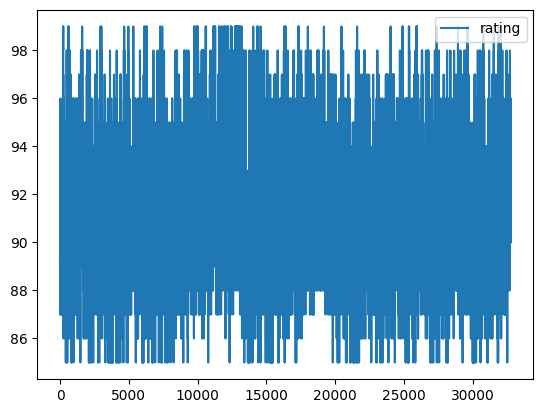

In [9]:
import matplotlib as plt
df.plot()

<Axes: >

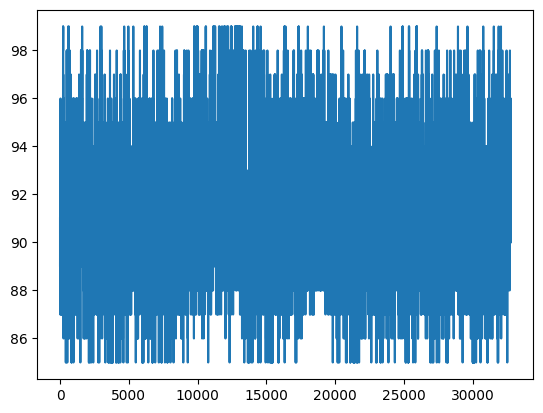

In [11]:
df['rating'].plot()

<Axes: xlabel='rating', ylabel='variety'>

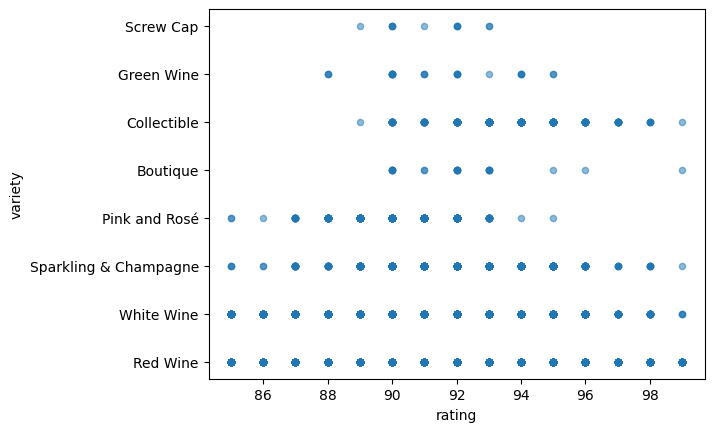

In [14]:
df.plot.scatter(x='rating', y='variety', alpha=0.5)

### Exercises

*    Load a dataset and practice subsetting columns and filtering rows with different criteria.

*    Try splitting a text column on a delimiter and extracting partial strings.

*    Define a custom function that flags outlier data points in a DataFrame.

*    Create histograms, scatter plots, or other relevant graphs to visualize the distribution of columns.

*    Compose a multi-condition query to filter a DataFrame for top customer sales by region.

0        False
1        False
2        False
3        False
4        False
         ...  
32775    False
32776    False
32777    False
32778    False
32779    False
Name: rating, Length: 32421, dtype: bool

### Key Terms

*    Array: Primary data structure in NumPy, represented as homogeneous n-dimensional grid of values.

*    Reshape: Transform an array into a new shape with same number of elements.

*    Ravel: Flatten an array into one dimensional shape.

*    Stack: Vertically or horizontally concatenate arrays.

*    Slice: Extract subset of array elements using indexing.

In [16]:
import numpy as np

In [17]:
#arrays are homogenous (same type unlike list)

array = np.array([1,2,3,4,5]) #creating array from list
array

array([1, 2, 3, 4, 5])

In [20]:
#two dimension
array = np.array([[1,2],[1,2]])
array

array([[1, 2],
       [1, 2]])

In [21]:
#2x2 array with random floats of 0 to 1
np.random.rand(2,2)

array([[0.69913007, 0.23875055],
       [0.50519007, 0.5674173 ]])

In [22]:
#full out 3x4 array with specific number
np.full((3,4),8)

array([[8, 8, 8, 8],
       [8, 8, 8, 8],
       [8, 8, 8, 8]])

In [23]:
np.ones((4,4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [25]:
np.zeros((4,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [26]:
#simple sequence from 0 to 4
np.arange(0,5)

array([0, 1, 2, 3, 4])

In [27]:
#sequence with three steps from 0 to 27
np.arange(0,27,3)

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24])

In [ ]:
#common numpy operations
